# Solution
Here we are going to create a function that fits to a polynomial of any degree (this includes linear case). so what we are going to do is use the function that computes the Fibonacci numbers (recursively and dynamically).

In [1]:
import time
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
def fib(n):
    if n==0:
        return 0
    if n==1:
        return 1
    else:
        return fib(n-1)+fib(n-2)

def fib_fast(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    elif n>0:
        f_n_1=fib(1)
        f_n_2=fib(0)
        f_n=0
        for i in range(n-1):
            f_n = (f_n_1+f_n_2)
            f_n_2=f_n_1
            f_n_1=f_n
        return f_n
def Measure_time_fib(n):
    times=[]
    for i in range(n):
        init=time.time()
        fib(n)
        difference_time=float(time.time()-init)
        times.append(difference_time)
    return times
def Measure_time_fib_fast(n,step=1):
    times=[]
    for i in range(0,n,step):
        init=time.time()
        fib_fast(n)
        difference_time=float(time.time()-init)
        times.append(difference_time)
    return times

In [2]:
number=30
fib_times=Measure_time_fib(number)
fib_times_fast=Measure_time_fib_fast(number)

Once we have our data we would like to express it in a better way, just to be clear what we are using here we use the same X for each case

In [3]:
y_fib=fib_times
y_fib_fast=fib_times_fast
X=np.arange(number)

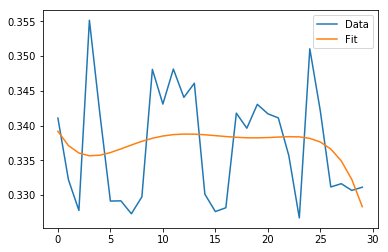

In [4]:
degree=5
def Poly_model(X,*params):
    y=params[0]*np.ones(len(X))
    for i in range(degree):
        y+=params[i+1]*(X**(i+1))
    return y

popt,pcov=curve_fit(Poly_model,X,y_fib,p0=[1,1,1,1,1,1])
plt.plot(X,y_fib,label="Data")
plt.plot(X,Poly_model(X,*popt),label="Fit")
plt.legend()
plt.show()

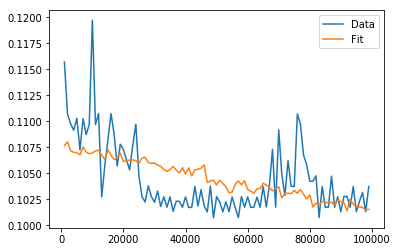

In [5]:
def Measure_time_fib_fast(n,step=1):
    times=[]
    for i in range(1000,n,step):
        init=time.time()
        fib_fast(n)
        difference_time=float(time.time()-init)
        times.append(difference_time)
    return times
number=100000
fib_times_fast=Measure_time_fib_fast(number,1000)
y_fib_fast=fib_times_fast
X=np.arange(1000,number,1000)
popt,pcov=curve_fit(Poly_model,X,y_fib_fast,p0=[1,1,1,1,1,1])
plt.plot(X,y_fib_fast,label="Data")
plt.plot(X,Poly_model(X,*popt),label="Fit")
plt.legend()
plt.show()

To compute the $R^2$ we can do

In [6]:
R_2= 1- np.var(y_fib_fast-Poly_model(X,*popt))/np.var(y_fib_fast)
print("the R**2 for this case was {}".format(R_2))

the R**2 for this case was 0.27286253758934


To compute the confidence intervals we can evaluate the function on each parameter:

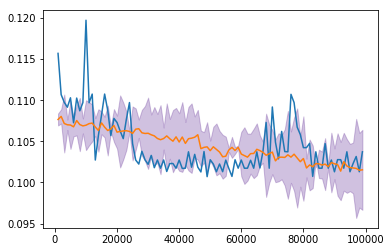

In [7]:
y_plus=Poly_model(X,*popt+2.0*np.sqrt(np.diagonal(pcov))) # 2 sigma of confidence interval
y_minous=Poly_model(X,*popt-2.0*np.sqrt(np.diagonal(pcov)))
plt.plot(X,y_fib_fast,label="Data")
plt.plot(X,Poly_model(X,*popt),label="Fit")
plt.fill_between(X,y_minous,y_plus,color="rebeccapurple",alpha=0.3)

# Fitting Gaussians

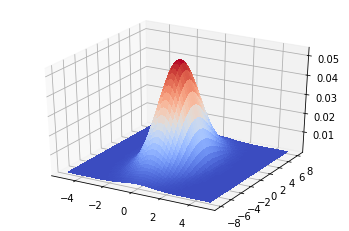

In [8]:
import numpy as np
def Gausian_2D(x,y,mu_x,mu_y,sigma_x,sigma_y):
    return 1.0/(2*np.pi*sigma_x*sigma_y)*np.exp(-0.5*
                                                ((x-mu_x)**2/sigma_x**2)
                                                - 0.5*
                                                ((y-mu_y)**2/sigma_y**2))

x=np.linspace(-5,5,1000)
y=np.linspace(-8,8,1000)
X,Y=np.meshgrid(x,y)
z=Gausian_2D(X,Y,0,0,1,3)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, z, cmap="coolwarm",linewidth=0, antialiased=False)

plt.show()

the solution of this problem was quite easy if you understand what meshgrid makes, the solution of scipy taking only one parameter is to change the function ``Gausian_2D`` to take only one parameter and then split it.

In [9]:
def Gausian_2D(XY,mu_x,mu_y,sigma_x,sigma_y):
    #xy is going to be the meshgrid
    x,y=XY
    return 1.0/(2*np.pi*sigma_x*sigma_y)*np.exp(-0.5*
                                                ((x-mu_x)**2/sigma_x**2)
                                                - 0.5*
                                                ((y-mu_y)**2/sigma_y**2))

Now we pass the flattened arrays using flatten, and we can fit

In [10]:
x=np.linspace(-5,5,1000)
y=np.linspace(-8,8,1000)
X,Y=np.meshgrid(x,y)
z=Gausian_2D((X,Y),0,0,1,3)+np.random.normal(0,0.01,size=X.shape)
popt,pcov=curve_fit(Gausian_2D, (X.flatten(),Y.flatten()), z.flatten())

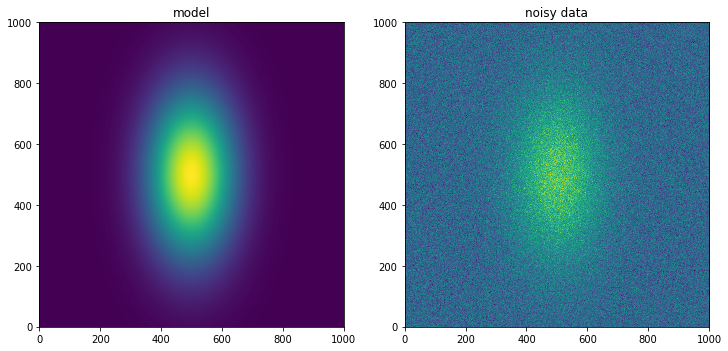

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('model')
plt.imshow(Gausian_2D((X,Y),0,0,1,3), origin='bottom')
plt.grid(visible=False)
plt.subplot(1,2,2)
plt.title('noisy data')
plt.imshow(z, origin='bottom')
plt.grid(visible=False)
plt.show()

We plot our results

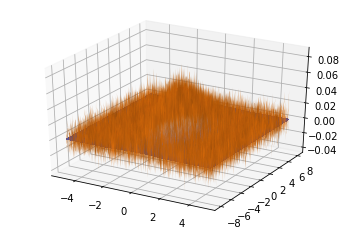

Fit R-squared: 0.5593698566039016 

Fit mu_x: -0.000174367948004233 ± 0.001100146352927957
Fit mu_y:  -0.0005636875895952371 ± 0.003306964889122308
Fit sigma_x:  0.9999800569944778 ± 0.0009536765290975524
Fit sigma_y:   3.002319875989519 ± 0.0028788509531393666


In [12]:
x=np.linspace(-5,5,1000)
y=np.linspace(-8,8,1000)
X,Y=np.meshgrid(x,y)
z_fit=Gausian_2D((X,Y),*popt)
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, z_fit, cmap="coolwarm",linewidth=0, antialiased=False)
ax.plot_surface(X,Y,z)
plt.show()
R_2=1-np.var(z-z_fit)/np.var(z)
errors=np.sqrt(np.diagonal(pcov))

print('Fit R-squared:', R_2, '\n')
print('Fit mu_x:', popt[0], '\u00b1', errors[0])
print('Fit mu_y: ', popt[1], '\u00b1', errors[1])
print('Fit sigma_x: ', popt[2], '\u00b1', errors[2])
print('Fit sigma_y:  ', popt[3], '\u00b1', errors[3])

since we can not visualize quite well it is better to see the projection in 2D to see how this is fitting, for doing this is it convenient to plot the contour plot (of course this is optional). Even more as we can see the last parameters coincide with the parameters we set at the beginning. 

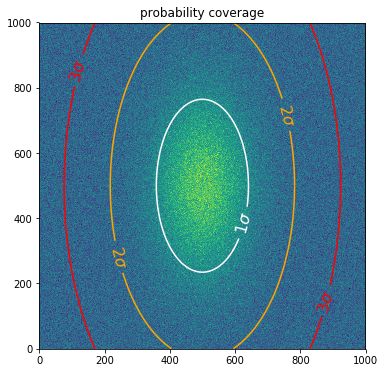

In [13]:
# set contour levels out to 3 sigma
mu_x,mu_y,sigma_x,sigma_y=0,0,1,3
sigma_x_pts = mu_x + np.array([sigma_x, 2*sigma_x, 3*sigma_x])
sigma_y_pts = mu_y + np.array([sigma_y, 2*sigma_y, 3*sigma_y])
sigma_X,sigma_Y = np.meshgrid(sigma_x_pts, sigma_y_pts)
contour_levels = Gausian_2D((sigma_X,sigma_Y), mu_x, mu_y, 
                             sigma_x, sigma_y)
contour_levels = list(np.diag(contour_levels)[::-1])
# make labels for each contour
labels = {}
label_txt = [r'$3\sigma$', r'$2\sigma$', r'$1\sigma$']
for level, label in zip(contour_levels, label_txt):
    #print(level,label)
    labels[level] = label
    
plt.figure(figsize=(6,6))
plt.title('probability coverage')
plt.imshow(z, origin='lower')
CS = plt.contour(z_fit, levels=contour_levels, colors=['red', 'orange', 'white'])
plt.clabel(CS, fontsize=16, inline=1, fmt=labels)
plt.grid(visible=False)
plt.show()